In [1]:
import read_mist_models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [407]:
eep = read_mist_models.EEP('../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')

Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep


In [408]:
print('version: ', eep.version)
print('abundances: ', eep.abun)
print('rotation: ', eep.rot)
print('initial mass: ', eep.minit)
print('available columns: ', eep.hdr_list)

version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142857, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.0
initial mass:  1.0
available columns:  ['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7', 'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20', 'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32', 'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_omega', 'center_gamma', 'mass_conv_

In [409]:
# eep.plot_HR(color='Black', phases=[0, 6], phasecolor=['Red', 'Blue'])
# Following the FSPS notation, PMS:-1 ; MS:0 ; SGB+RGB:2 ; CHeB:3 ; EAGB:4 ; TPAGB:5 ; 
# post-AGB:6 ; WR:9

In [410]:
L = eep.eeps['log_L']
T = eep.eeps['log_Teff']
g = eep.eeps['log_g']

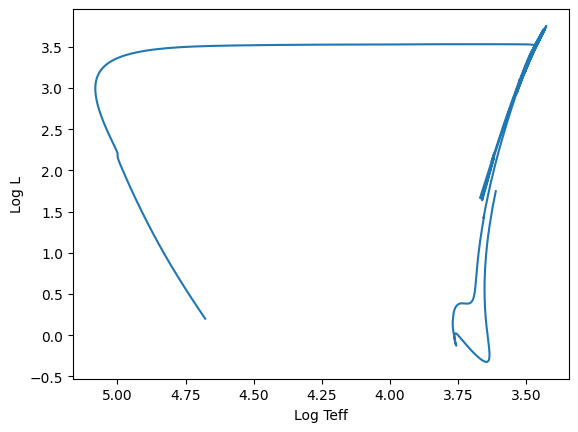

In [411]:
plt.plot(T,L)
plt.gca().invert_xaxis()
plt.xlabel('Log Teff')
plt.ylabel('Log L')
plt.show()

That's all straightforward but now we need to convert Teff to Bp-Rp and L to G

In [412]:
# first convert L to Mbol
# lol right this is in solar luminosity units so the zero point is just one
Mbol = -2.5*L + 4.74
Mbol

array([0.37077188, 0.38073546, 0.39106148, ..., 4.11298497, 4.17659207,
       4.24010957])

In [400]:
# then can apply a bolometric correction to get that to the other magnitudes?
# bolometric correction is a function of temperature and logg (in the tables)

bolo_corr = pd.read_csv('../UBVRIplus/fehp000.UBVRIplus',
                        header=5,sep='\s+',on_bad_lines='skip')
bolo_corr_relevant = bolo_corr[bolo_corr['Av']==0]
bolo_corr_relevant

,Teff,logg,[Fe/H],Av,Rv,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,...,Gaia_BP_DR2Rev,Gaia_RP_DR2Rev,Gaia_G_MAW,Gaia_BP_MAWb,Gaia_BP_MAWf,Gaia_RP_MAW,TESS,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3
0,2500.0,-4.0,0.0,0.0,3.1,-8.128579,-8.388813,-6.954198,-4.520349,-2.177872,...,-7.113032,-2.129786,-3.683901,-7.070033,-7.094977,-2.091843,-1.722970,-3.691364,-7.095306,-2.124816
1,2500.0,-3.0,0.0,0.0,3.1,-8.128579,-8.388813,-6.954198,-4.520349,-2.177872,...,-7.113032,-2.129786,-3.683901,-7.070033,-7.094977,-2.091843,-1.722970,-3.691364,-7.095306,-2.124816
2,2500.0,-2.0,0.0,0.0,3.1,-8.128579,-8.388813,-6.954198,-4.520349,-2.177872,...,-7.113032,-2.129786,-3.683901,-7.070033,-7.094977,-2.091843,-1.722970,-3.691364,-7.095306,-2.124816
3,2500.0,-1.5,0.0,0.0,3.1,-8.128579,-8.388813,-6.954198,-4.520349,-2.177872,...,-7.113032,-2.129786,-3.683901,-7.070033,-7.094977,-2.091843,-1.722970,-3.691364,-7.095306,-2.124816
4,2500.0,-1.0,0.0,0.0,3.1,-8.128579,-8.388813,-6.954198,-4.520349,-2.177872,...,-7.113032,-2.129786,-3.683901,-7.070033,-7.094977,-2.091843,-1.722970,-3.691364,-7.095306,-2.124816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,1000000.0,7.5,0.0,0.0,3.1,-11.921102,-13.240746,-13.623014,-13.791091,-14.010837,...,-13.287952,-13.975341,-13.557568,-13.346040,-13.276860,-13.960440,-13.964506,-13.560292,-13.350248,-13.980786
1816,1000000.0,8.0,0.0,0.0,3.1,-11.921102,-13.240746,-13.623014,-13.791091,-14.010837,...,-13.287952,-13.975341,-13.557568,-13.346040,-13.276860,-13.960440,-13.964506,-13.560292,-13.350248,-13.980786
1817,1000000.0,8.5,0.0,0.0,3.1,-11.921102,-13.240746,-13.623014,-13.791091,-14.010837,...,-13.287952,-13.975341,-13.557568,-13.346040,-13.276860,-13.960440,-13.964506,-13.560292,-13.350248,-13.980786
1818,1000000.0,9.0,0.0,0.0,3.1,-11.921102,-13.240746,-13.623014,-13.791091,-14.010837,...,-13.287952,-13.975341,-13.557568,-13.346040,-13.276860,-13.960440,-13.964506,-13.560292,-13.350248,-13.980786


In [401]:
# teff_list = []
# logg_list = []
# for i in range(0,len(bolo_corr_relevant)):
#     if bolo_corr_relevant['Teff'][i] not in teff_list:
#         teff_list.append(bolo_corr_relevant['Teff'][i])
#     if bolo_corr_relevant['logg'][i] not in logg_list:
#         logg_list.append(bolo_corr_relevant['logg'][i])
        
# print(teff_list)
# print(logg_list)

In [52]:
#apparently all of this was NOT NECESSARY for using interp2d oh well
teff_vals, teff_idx = np.unique(bolo_corr_relevant['Teff'], return_inverse=True)
logg_vals, logg_idx = np.unique(bolo_corr_relevant['logg'], return_inverse=True)
vals_array = np.empty((len(teff_vals),len(logg_vals)))
vals_array.fill(0) # or whatever your desired missing data flag is
vals_array[teff_idx, logg_idx] = bolo_corr_relevant['Gaia_G_EDR3']
bolo_g = vals_array.T
print(bolo_g)

[[ -3.691364  -3.480922  -2.922356 ... -12.837304 -13.218816 -13.560292]
 [ -3.691364  -3.480922  -2.922356 ... -12.837304 -13.218816 -13.560292]
 [ -3.691364  -3.480922  -2.922356 ... -12.837304 -13.218816 -13.560292]
 ...
 [ -2.262595  -1.689232  -1.334917 ... -12.837304 -13.218816 -13.560292]
 [ -2.262595  -1.689232  -1.334917 ... -12.837304 -13.218816 -13.560292]
 [ -2.262595  -1.689232  -1.334917 ... -12.837304 -13.218816 -13.560292]]


In [53]:
vals_array = np.empty((len(teff_vals),len(logg_vals)))
vals_array.fill(0) # or whatever your desired missing data flag is
vals_array[teff_idx, logg_idx] = bolo_corr_relevant['Gaia_BP_EDR3']
bolo_bp = vals_array.T
print(bolo_bp)

[[ -7.095306  -6.556701  -5.920595 ... -12.627694 -13.008965 -13.350248]
 [ -7.095306  -6.556701  -5.920595 ... -12.627694 -13.008965 -13.350248]
 [ -7.095306  -6.556701  -5.920595 ... -12.627694 -13.008965 -13.350248]
 ...
 [ -5.953775  -4.216551  -3.327507 ... -12.627694 -13.008965 -13.350248]
 [ -5.953775  -4.216551  -3.327507 ... -12.627694 -13.008965 -13.350248]
 [ -5.953775  -4.216551  -3.327507 ... -12.627694 -13.008965 -13.350248]]


In [54]:
vals_array = np.empty((len(teff_vals),len(logg_vals)))
vals_array.fill(0) # or whatever your desired missing data flag is
vals_array[teff_idx, logg_idx] = bolo_corr_relevant['Gaia_RP_EDR3']
bolo_rp = vals_array.T
print(bolo_rp)

[[ -2.124816  -1.962184  -1.44243  ... -13.256607 -13.63878  -13.980786]
 [ -2.124816  -1.962184  -1.44243  ... -13.256607 -13.63878  -13.980786]
 [ -2.124816  -1.962184  -1.44243  ... -13.256607 -13.63878  -13.980786]
 ...
 [ -0.721157  -0.291647  -0.027753 ... -13.256607 -13.63878  -13.980786]
 [ -0.721157  -0.291647  -0.027753 ... -13.256607 -13.63878  -13.980786]
 [ -0.721157  -0.291647  -0.027753 ... -13.256607 -13.63878  -13.980786]]


In [12]:
from scipy.interpolate import interp2d

In [60]:
bolo_g_interp = interp2d(teff_vals,logg_vals,bolo_g) #default is a linear fit
bolo_bp_interp = interp2d(teff_vals,logg_vals,bolo_bp)
bolo_rp_interp = interp2d(teff_vals,logg_vals,bolo_rp)

In [413]:
g_mag = []
bp_min_rp = []
for i in range(0,len(L)):
    #Mbol, g, T (which is a log)
    g_mag.append(Mbol[i] - bolo_g_interp(10**(T[i]),g[i])[0])
#     print(Mbol[i] - bolo_g_interp(10**(T[i]),g[i])[0])
    bp = Mbol[i] - bolo_bp_interp(10**(T[i]),g[i])[0]
    rp = Mbol[i] - bolo_rp_interp(10**(T[i]),g[i])[0]
    bp_min_rp.append(bp - rp)

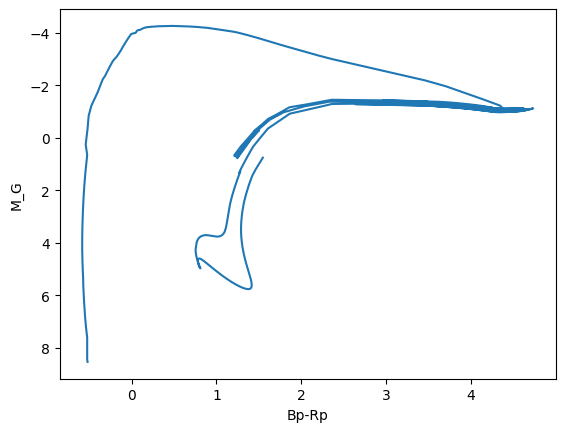

In [414]:
plt.plot(bp_min_rp,g_mag)
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.xlabel('Bp-Rp')
plt.ylabel('M_G')
plt.show()

In [415]:
age = eep.eeps['star_age']
age

array([1.76636786e+03, 1.86069470e+03, 1.96010550e+03, ...,
       1.14652974e+10, 1.14653830e+10, 1.14654715e+10])

In [416]:
cmd_output = np.concatenate(([bp_min_rp],[g_mag],[age]))
cmd_frame = pd.DataFrame(cmd_output.transpose(),columns=['Bp-Rp','M_G','star_age'])
cmd_frame

,Bp-Rp,M_G,star_age
0,1.547061,0.755451,1.766368e+03
1,1.545425,0.763929,1.860695e+03
2,1.543715,0.772703,1.960106e+03
3,1.541835,0.781551,2.064862e+03
4,1.540025,0.791054,2.175210e+03
...,...,...,...
1705,-0.523183,8.438772,1.146513e+10
1706,-0.521997,8.461458,1.146521e+10
1707,-0.520821,8.484418,1.146530e+10
1708,-0.519656,8.507676,1.146538e+10


In [417]:
cmd_frame.to_csv('../MIST_z0_v0_10M_cmd.csv',index=False)